# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [3]:
# function to intialize the weights and bias randomly
def initialize(dim,zeros=False):
    if(zeros):
        b = 0
        w = np.zeros(dim)
    
    else:
        b = np.random.random()
        w = np.random.rand(dim)
    return b, w

In [4]:
# function to predict the output
def predict_y(x,w,b):
    return  np.dot(x,w) + b


In [5]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb =  predict_y(x[i],w,b)
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [6]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [7]:
def compute_gradient(x,y,w,b):
    m,n = x.shape    
    dj_dw = np.zeros(n)
    dj_db = 0.  
    
    for i in range(m):  
        err = predict_y(x[i],w,b) - y[i]
        dj_db += err
        for j in range(n):
            dj_dw[j] += err * x[i][j]
    dj_dw = dj_dw / m 
    dj_db = dj_db / m
    # d_w = d_w / n
    # d_b = d_b /  n
    return dj_dw, dj_db

In [8]:
def gradient_descent(x,y,w_in,b_in,iter,lr):
    w = np.zeros_like(w_in)
    b = 0
    j_history = []
    for i in range(iter): 
        d_w, d_b = compute_gradient(x,y,w,b)
        w = w - lr * d_w
        b = b - lr * d_b
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history

In [9]:
iterations = 1000
alpha = 5.0e-7
dim = len(X_train[0])
b,w = initialize(dim)
w,b,j = gradient_descent(X_train,y_train,w_in=w,b_in=b,iter=iterations,lr=alpha)

In [10]:
j

[2529.46295223163,
 765.8336829952988,
 699.6290280210446,
 697.1337425623094,
 697.0296591788103,
 697.0153256006653,
 697.0043615139086,
 696.9935248096691,
 696.9826938019223,
 696.9718639233548,
 696.9610350024587,
 696.9502070327148,
 696.9393800137989,
 696.9285539456151,
 696.9177288280791,
 696.9069046611058,
 696.8960814446137,
 696.8852591785139,
 696.8744378627272,
 696.8636174971623,
 696.8527980817419,
 696.8419796163755,
 696.8311621009814,
 696.8203455354765,
 696.8095299197731,
 696.7987152537909,
 696.7879015374392,
 696.7770887706384,
 696.7662769533032,
 696.7554660853489,
 696.7446561666904,
 696.7338471972458,
 696.7230391769273,
 696.7122321056518,
 696.7014259833372,
 696.6906208098933,
 696.6798165852422,
 696.6690133092945,
 696.6582109819711,
 696.6474096031822,
 696.6366091728471,
 696.6258096908771,
 696.6150111571949,
 696.6042135717122,
 696.5934169343424,
 696.5826212450056,
 696.5718265036137,
 696.5610327100842,
 696.5502398643335,
 696.5394479662783,
 

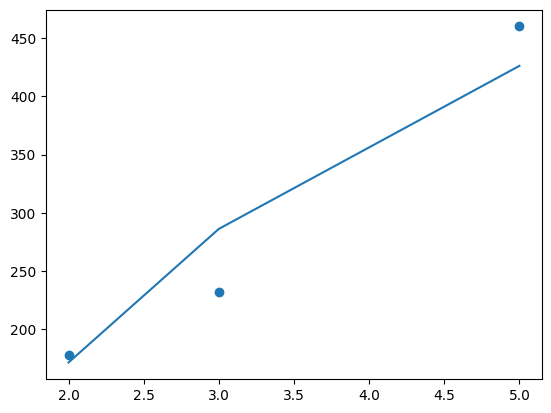

In [11]:
plt.scatter(X_train[:,1],y_train)
plt.plot(X_train[:,1],predict_y(X_train,w,b))

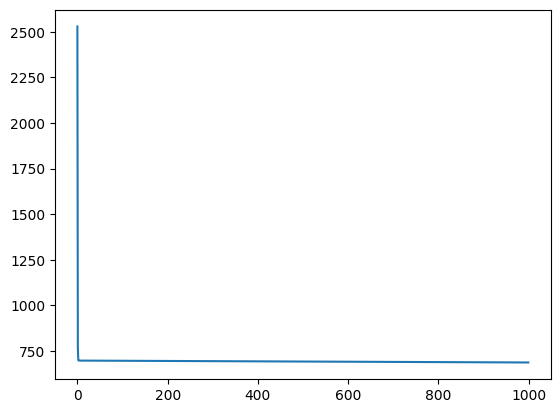

In [12]:

plt.plot(list(range(iterations)),j)

In [13]:
data = pd.read_csv('CarPrice_assignment.csv',index_col=0)

In [14]:
data.iloc[1]

symboling                             3
CarName             alfa-romero stelvio
fueltype                            gas
aspiration                          std
doornumber                          two
carbody                     convertible
drivewheel                          rwd
enginelocation                    front
wheelbase                          88.6
carlength                         168.8
carwidth                           64.1
carheight                          48.8
curbweight                         2548
enginetype                         dohc
cylindernumber                     four
enginesize                          130
fuelsystem                         mpfi
boreratio                          3.47
stroke                             2.68
compressionratio                    9.0
horsepower                          111
peakrpm                            5000
citympg                              21
highwaympg                           27
price                           16500.0


In [15]:
import category_encoders as ce
ce_OHE = ce.OneHotEncoder(cols=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

data1 = ce_OHE.fit_transform(data)

In [16]:
y_train = data1['price']
X_train = data1.drop(columns='price')

In [17]:
X_train = np.array(X_train)

In [18]:
y_train = np.array(y_train)

In [19]:
iterations = 1000
alpha = 0.000005
dim = len(X_train[0])
b,w = initialize(dim)
w,b,j = gradient_descent(X_train,y_train,w_in=w,b_in=b,iter=iterations,lr=alpha)

C:\Users\malak\AppData\Local\Temp\ipykernel_11436\1949849254.py:8: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb - y[i])**2
C:\Users\malak\AppData\Local\Temp\ipykernel_11436\3561843667.py:10: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] += err * x[i][j]
C:\Users\malak\AppData\Local\Temp\ipykernel_11436\3561843667.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  dj_dw[j] += err * x[i][j]
C:\Users\malak\AppData\Local\Temp\ipykernel_11436\1801013584.py:7: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * d_w


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [21]:
model.score(X_train,y_train)

0.9970655594822811

In [22]:
j[1] > j[0]

True